In [56]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from models.ddm import DDM, CP
from plots import redm
from metrics import inversion_number, wilcoxon_test, effect_size, friedman_test_for_4_samples
from metrics import friedman_test_for_8_samples
from plots import heatmap, training_loss
from torchmetrics.classification import BinaryCalibrationError
import torch

In [2]:
training_loss_0 = np.loadtxt("outputs/_training_loss_ae_model_nsl_0.csv", delimiter=",")
training_loss_1 = np.loadtxt("outputs/_training_loss_ae_model_nsl_1.csv", delimiter=",")
training_loss_2 = np.loadtxt("outputs/_training_loss_ae_model_nsl_2.csv", delimiter=",")
training_loss_3 = np.loadtxt("outputs/_training_loss_ae_model_nsl_3.csv", delimiter=",")
training_loss_4 = np.loadtxt("outputs/_training_loss_ae_model_nsl_4.csv", delimiter=",")
training_loss_mcd = np.loadtxt("outputs/_training_loss_ae_dropout_model_nsl.csv", delimiter=",")
training_loss_vae = np.loadtxt("outputs/_training_loss_vae_model_nsl.csv", delimiter=",")

In [3]:
training_loss_edl = (training_loss_0 + training_loss_1 + training_loss_2 + training_loss_3 + training_loss_4)/5

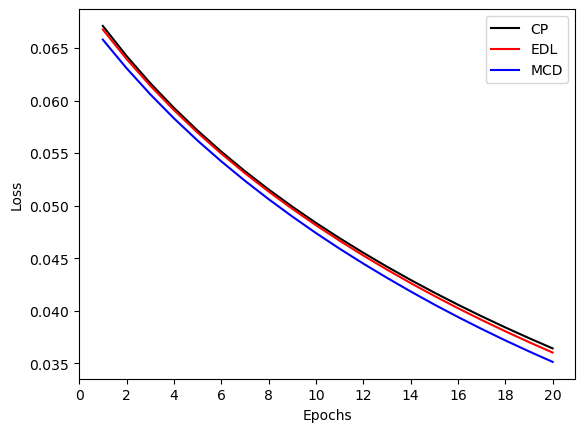

In [4]:
training_loss(training_loss_0, training_loss_edl, training_loss_mcd, training_loss_vae, dbname="nsl")

In [5]:
# edl
edl_score_0 = np.loadtxt("outputs/nsl_scores_test_ae_model_nsl_0.csv", delimiter=",")
edl_score_1 = np.loadtxt("outputs/nsl_scores_test_ae_model_nsl_1.csv", delimiter=",")
edl_score_2 = np.loadtxt("outputs/nsl_scores_test_ae_model_nsl_2.csv", delimiter=",")
edl_score_3 = np.loadtxt("outputs/nsl_scores_test_ae_model_nsl_3.csv", delimiter=",")
edl_score_4 = np.loadtxt("outputs/nsl_scores_test_ae_model_nsl_4.csv", delimiter=",")

In [6]:
# mcd
mcd_score_0 = np.loadtxt("outputs/nsl_scores_test_ae_dropout_model_nsl0.csv", delimiter=",")
mcd_score_1 = np.loadtxt("outputs/nsl_scores_test_ae_dropout_model_nsl1.csv", delimiter=",")
mcd_score_2 = np.loadtxt("outputs/nsl_scores_test_ae_dropout_model_nsl2.csv", delimiter=",")
mcd_score_3 = np.loadtxt("outputs/nsl_scores_test_ae_dropout_model_nsl3.csv", delimiter=",")
mcd_score_4 = np.loadtxt("outputs/nsl_scores_test_ae_dropout_model_nsl4.csv", delimiter=",")

In [7]:
# mcd
vae_score_0 = np.loadtxt("outputs/nsl_scores_test_vae_model_nsl0.csv", delimiter=",")
vae_score_1 = np.loadtxt("outputs/nsl_scores_test_vae_model_nsl1.csv", delimiter=",")
vae_score_2 = np.loadtxt("outputs/nsl_scores_test_vae_model_nsl2.csv", delimiter=",")
vae_score_3 = np.loadtxt("outputs/nsl_scores_test_vae_model_nsl3.csv", delimiter=",")
vae_score_4 = np.loadtxt("outputs/nsl_scores_test_vae_model_nsl4.csv", delimiter=",")

In [8]:
edl_scores = np.concatenate((edl_score_0.reshape(-1, 1), edl_score_1.reshape(-1, 1), edl_score_2.reshape(-1, 1),
                            edl_score_3.reshape(-1, 1), edl_score_4.reshape(-1, 1)), axis=1)
mcd_scores = np.concatenate((mcd_score_0.reshape(-1, 1), mcd_score_1.reshape(-1, 1), mcd_score_2.reshape(-1, 1),
                            mcd_score_3.reshape(-1, 1), mcd_score_4.reshape(-1, 1)), axis=1)
vae_scores = np.concatenate((vae_score_0.reshape(-1, 1), vae_score_1.reshape(-1, 1), vae_score_2.reshape(-1, 1),
                            vae_score_3.reshape(-1, 1), vae_score_4.reshape(-1, 1)), axis=1)

In [9]:
edl_eta_0 = np.loadtxt("outputs/nsl_threshold_ae_model_nsl_0.csv")
edl_eta_1 = np.loadtxt("outputs/nsl_threshold_ae_model_nsl_1.csv")
edl_eta_2 = np.loadtxt("outputs/nsl_threshold_ae_model_nsl_2.csv")
edl_eta_3 = np.loadtxt("outputs/nsl_threshold_ae_model_nsl_3.csv")
edl_eta_4 = np.loadtxt("outputs/nsl_threshold_ae_model_nsl_4.csv")

In [10]:
vae_eta = np.loadtxt("outputs/nsl_threshold_vae_model_nsl.csv")

In [11]:
mcd_eta = np.loadtxt("outputs/nsl_threshold_ae_dropout_model_nsl.csv")

In [12]:
XY_test = np.loadtxt("data/nsl_test.csv", delimiter=',')

In [13]:
y_test = XY_test[:, -1]

In [14]:
y_edl_pred_0 = (edl_score_0 > edl_eta_0).astype(int)
y_edl_pred_1 = (edl_score_1 > edl_eta_1).astype(int)
y_edl_pred_2 = (edl_score_2 > edl_eta_2).astype(int)
y_edl_pred_3 = (edl_score_3 > edl_eta_3).astype(int)
y_edl_pred_4 = (edl_score_4 > edl_eta_4).astype(int)

In [15]:
y_mcd_pred_0 = (mcd_score_0 > mcd_eta).astype(int)
y_mcd_pred_1 = (mcd_score_1 > mcd_eta).astype(int)
y_mcd_pred_2 = (mcd_score_2 > mcd_eta).astype(int)
y_mcd_pred_3 = (mcd_score_3 > mcd_eta).astype(int)
y_mcd_pred_4 = (mcd_score_4 > mcd_eta).astype(int)

In [16]:
y_vae_pred_0 = (vae_score_0 > vae_eta).astype(int)
y_vae_pred_1 = (vae_score_1 > vae_eta).astype(int)
y_vae_pred_2 = (vae_score_2 > vae_eta).astype(int)
y_vae_pred_3 = (vae_score_3 > vae_eta).astype(int)
y_vae_pred_4 = (vae_score_4 > vae_eta).astype(int)

In [57]:
print(classification_report(y_test, y_edl_pred_0))
print(classification_report(y_test, y_edl_pred_1))
print(classification_report(y_test, y_edl_pred_2))
print(classification_report(y_test, y_edl_pred_3))
print(classification_report(y_test, y_edl_pred_4))
print(accuracy_score(y_test, y_edl_pred_0))
print(accuracy_score(y_test, y_edl_pred_1))
print(accuracy_score(y_test, y_edl_pred_2))
print(accuracy_score(y_test, y_edl_pred_3))
print(accuracy_score(y_test, y_edl_pred_4))

              precision    recall  f1-score   support

         0.0       0.61      0.54      0.58     21589
         1.0       0.83      0.87      0.85     57156

    accuracy                           0.78     78745
   macro avg       0.72      0.71      0.71     78745
weighted avg       0.77      0.78      0.78     78745

              precision    recall  f1-score   support

         0.0       0.61      0.61      0.61     21589
         1.0       0.85      0.85      0.85     57156

    accuracy                           0.79     78745
   macro avg       0.73      0.73      0.73     78745
weighted avg       0.79      0.79      0.79     78745

              precision    recall  f1-score   support

         0.0       0.61      0.58      0.60     21589
         1.0       0.85      0.86      0.85     57156

    accuracy                           0.78     78745
   macro avg       0.73      0.72      0.72     78745
weighted avg       0.78      0.78      0.78     78745

              preci

In [58]:
print(classification_report(y_test, y_mcd_pred_0))
print(classification_report(y_test, y_mcd_pred_1))
print(classification_report(y_test, y_mcd_pred_2))
print(classification_report(y_test, y_mcd_pred_3))
print(classification_report(y_test, y_mcd_pred_4))
print(accuracy_score(y_test, y_mcd_pred_0))
print(accuracy_score(y_test, y_mcd_pred_1))
print(accuracy_score(y_test, y_mcd_pred_2))
print(accuracy_score(y_test, y_mcd_pred_3))
print(accuracy_score(y_test, y_mcd_pred_4))

              precision    recall  f1-score   support

         0.0       0.41      0.50      0.45     21589
         1.0       0.79      0.73      0.76     57156

    accuracy                           0.67     78745
   macro avg       0.60      0.61      0.61     78745
weighted avg       0.69      0.67      0.68     78745

              precision    recall  f1-score   support

         0.0       0.41      0.51      0.45     21589
         1.0       0.80      0.73      0.76     57156

    accuracy                           0.67     78745
   macro avg       0.60      0.62      0.61     78745
weighted avg       0.69      0.67      0.68     78745

              precision    recall  f1-score   support

         0.0       0.41      0.51      0.45     21589
         1.0       0.80      0.73      0.76     57156

    accuracy                           0.67     78745
   macro avg       0.60      0.62      0.61     78745
weighted avg       0.69      0.67      0.68     78745

              preci

In [59]:
print(classification_report(y_test, y_vae_pred_0))
print(classification_report(y_test, y_vae_pred_1))
print(classification_report(y_test, y_vae_pred_2))
print(classification_report(y_test, y_vae_pred_3))
print(classification_report(y_test, y_vae_pred_4))
print(accuracy_score(y_test, y_vae_pred_0))
print(accuracy_score(y_test, y_vae_pred_1))
print(accuracy_score(y_test, y_vae_pred_2))
print(accuracy_score(y_test, y_vae_pred_3))
print(accuracy_score(y_test, y_vae_pred_4))

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84     21589
         1.0       0.94      0.94      0.94     57156

    accuracy                           0.91     78745
   macro avg       0.89      0.89      0.89     78745
weighted avg       0.91      0.91      0.91     78745

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84     21589
         1.0       0.94      0.94      0.94     57156

    accuracy                           0.91     78745
   macro avg       0.89      0.89      0.89     78745
weighted avg       0.91      0.91      0.91     78745

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84     21589
         1.0       0.94      0.94      0.94     57156

    accuracy                           0.91     78745
   macro avg       0.89      0.89      0.89     78745
weighted avg       0.91      0.91      0.91     78745

              preci

In [20]:
edl_eta = (edl_eta_0 + edl_eta_1 + edl_eta_2 + edl_eta_3 + edl_eta_4)/5

In [21]:
edl_mean_scores = np.mean(edl_scores, axis=1)
edl_std_scores = np.std(edl_scores, axis=1)

In [22]:
index_n = edl_mean_scores < edl_eta
index_a = edl_mean_scores >= edl_eta
edl_normal_scores = edl_mean_scores[index_n]

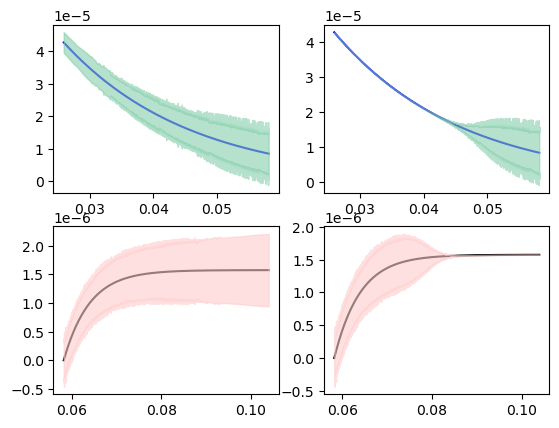

In [55]:
ddm_edl = DDM(edl_scores, y_test, edl_eta, d=0.3, phi=0.4)
normal_edl, abnormal_edl = ddm_edl.distribution_segments()
redm(normal_edl[:-1], abnormal_edl[:-1], "edl_distribution_nsl", scale_n =0.002, scale_a = 0.0001)

In [24]:
metric = BinaryCalibrationError(n_bins=2, norm='l2')
edl_confidence = torch.tensor(np.concatenate((normal_edl[1], abnormal_edl[1])))
edl_target = torch.tensor(np.concatenate((normal_edl[-1], abnormal_edl[-1])))
edl_confidence_p = torch.tensor(np.concatenate((normal_edl[2], abnormal_edl[2])))
print("edl = ", metric(edl_confidence, edl_target))
print("edl+ = ", metric(edl_confidence_p, edl_target))

edl =  tensor(0.7221, dtype=torch.float64)
edl+ =  tensor(0.7225, dtype=torch.float64)


In [25]:
wilcoxon_test(edl_confidence, edl_confidence_p)

0.0

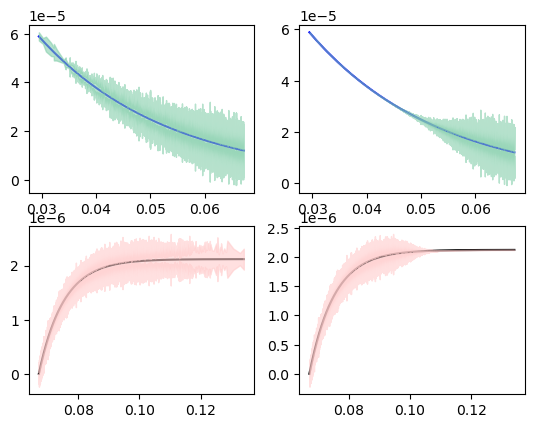

In [52]:
ddm_mcd = DDM(mcd_scores, y_test, mcd_eta, d=0.3, phi=.4)
normal_mcd, abnormal_mcd = ddm_mcd.distribution_segments()
redm(normal_mcd[:-1], abnormal_mcd[:-1], "mcd_distribution_nsl", scale_n =0.0005, scale_a = 0.00001)

In [27]:
mcd_confidence = torch.tensor(np.concatenate((normal_mcd[1], abnormal_mcd[1])))
mcd_target = torch.tensor(np.concatenate((normal_mcd[-1], abnormal_mcd[-1])))
mcd_confidence_p = torch.tensor(np.concatenate((normal_mcd[2], abnormal_mcd[2])))
print("mcd = ", metric(mcd_confidence, mcd_target))
print("mcd+ = ", metric(mcd_confidence_p, mcd_target))

mcd =  tensor(0.7146, dtype=torch.float64)
mcd+ =  tensor(0.7157, dtype=torch.float64)


In [28]:
wilcoxon_test(mcd_confidence, mcd_confidence_p)

0.0

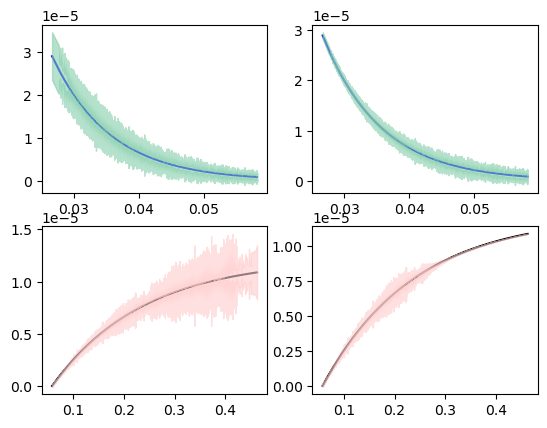

In [53]:
ddm_vae = DDM(vae_scores, y_test, edl_eta, d=0.3, phi=0.4)
normal_vae, abnormal_vae = ddm_vae.distribution_segments()
redm(normal_vae[:-1], abnormal_vae[:-1], "vae_distribution_nsl", scale_n =0.002, scale_a = 0.0001)

In [30]:
vae_confidence = torch.tensor(np.concatenate((normal_vae[1], abnormal_vae[1])))
vae_target = torch.tensor(np.concatenate((normal_vae[-1], abnormal_vae[-1])))
vae_confidence_p = torch.tensor(np.concatenate((normal_vae[2], abnormal_vae[2])))
print("vae = ", metric(vae_confidence, vae_target))
print("vae+ = ", metric(vae_confidence_p, vae_target))

vae =  tensor(0.7205, dtype=torch.float64)
vae+ =  tensor(0.7221, dtype=torch.float64)


In [31]:
wilcoxon_test(vae_confidence, vae_confidence_p)

0.0

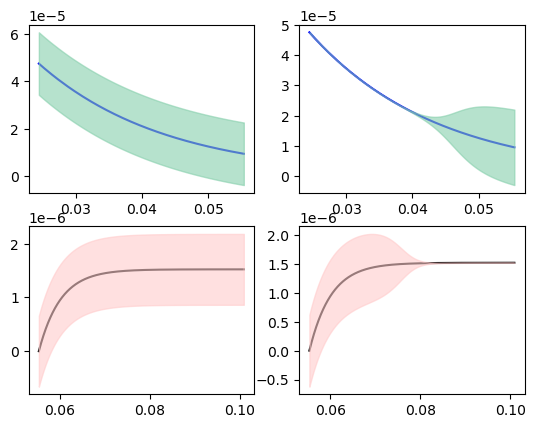

In [54]:
ddm_cp = DDM(edl_score_0, y_test, edl_eta_0, d=0.3, phi=0.4)
normal_cp, abnormal_cp = ddm_cp.distribution_segments(True)
redm(normal_cp[:-1], abnormal_cp[:-1], "cp_distribution_nsl", scale_n =0.0002, scale_a = 0.00001)

In [33]:
cp_confidence = torch.tensor(np.concatenate((normal_cp[1], abnormal_cp[1])))
cp_target = torch.tensor(np.concatenate((normal_cp[-1], abnormal_cp[-1])))
cp_confidence_p = torch.tensor(np.concatenate((normal_cp[2], abnormal_cp[2])))
print("cp = ", metric(cp_confidence, cp_target))
print("cp+ = ", metric(cp_confidence_p, cp_target))

cp =  tensor(0.6599, dtype=torch.float64)
cp+ =  tensor(0.6660, dtype=torch.float64)


In [34]:
wilcoxon_test(cp_confidence, cp_confidence_p)

0.0

In [35]:

conf = np.concatenate((edl_confidence.detach().cpu().numpy().reshape(-1, 1),
                              mcd_confidence.detach().cpu().numpy().reshape(-1, 1),
                              vae_confidence.detach().cpu().numpy().reshape(-1, 1),
                              cp_confidence.detach().cpu().numpy().reshape(-1, 1),
                              edl_confidence_p.detach().cpu().numpy().reshape(-1, 1),
                              mcd_confidence_p.detach().cpu().numpy().reshape(-1, 1),
                              vae_confidence_p.detach().cpu().numpy().reshape(-1, 1),
                              cp_confidence_p.detach().cpu().numpy().reshape(-1, 1)), axis=1)

In [36]:
friedman_test_for_4_samples(conf[:, 0], conf[:, 1], conf[:, 2], conf[:, 3])

0.0

In [37]:
friedman_test_for_4_samples(conf[:, 4], conf[:, 5], conf[:, 6], conf[:, 7])

0.0

In [38]:
friedman_test_for_8_samples(conf[:, 0], conf[:, 1], conf[:, 3], conf[:, 4],
                           conf[:, 4], conf[:, 5], conf[:, 6], conf[:, 7])

0.0

In [39]:
effect_sizes = np.zeros((8, 8))
for i in range(8):
    for j in range(8):
        if i!=j:
            s = np.concatenate((conf[:, i].reshape(-1, 1), conf[:, j].reshape(-1, 1)), axis=1)
            effect_sizes[i, j] = effect_size(s)

In [40]:
effect_sizes

array([[0.        , 0.91186795, 0.00450788, 1.        , 1.        ,
        0.79164684, 0.02971021, 0.98708874],
       [0.91186795, 0.        , 0.57291509, 1.        , 0.93250177,
        1.        , 0.81078881, 0.95346563],
       [0.00450788, 0.57291509, 0.        , 1.        , 0.02132427,
        0.46037117, 1.        , 0.98633187],
       [1.        , 1.        , 1.        , 0.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 0.93250177, 0.02132427, 1.        , 0.        ,
        0.90518629, 0.01116082, 1.        ],
       [0.79164684, 1.        , 0.46037117, 1.        , 0.90518629,
        0.        , 0.7296364 , 0.99989841],
       [0.02971021, 0.81078881, 1.        , 1.        , 0.01116082,
        0.7296364 , 0.        , 0.99761397],
       [0.98708874, 0.95346563, 0.98633187, 1.        , 1.        ,
        0.99989841, 0.99761397, 0.        ]])

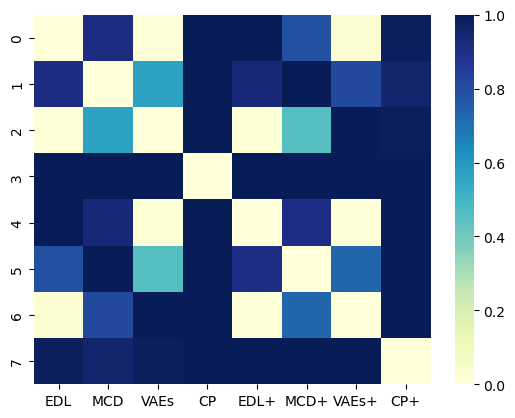

In [41]:
heatmap(effect_sizes, "nsl_heatmap")

In [42]:
in_edl = inversion_number(normal_edl[0], normal_edl[1], abnormal_edl[0], abnormal_edl[1], edl_eta)
in_edl_plus = inversion_number(normal_edl[0], normal_edl[2], abnormal_edl[0], abnormal_edl[2], edl_eta)
in_edl, in_edl_plus

NameError: name 'in_idl_plus' is not defined

In [43]:
in_edl, in_edl_plus

((0.19477731382472444, 0.872130406128264, 0.5334538599764942),
 (0.12751521185250622, 0.7813153372677477, 0.454415274560127))

In [44]:
in_mcd = inversion_number(normal_mcd[0], normal_mcd[1], abnormal_mcd[0], abnormal_mcd[1], mcd_eta)
in_mcd_plus = inversion_number(normal_mcd[0], normal_mcd[2], abnormal_mcd[0], abnormal_mcd[2], mcd_eta)
in_mcd, in_mcd_plus

((0.45350962529784666, 0.655036195880716, 0.5542729105892814),
 (0.32384505154550886, 0.617227253621225, 0.4705361525833669))

In [45]:
in_vae = inversion_number(normal_vae[0], normal_vae[1], abnormal_vae[0], abnormal_vae[1], vae_eta)
in_vae_plus = inversion_number(normal_vae[0], normal_vae[2], abnormal_vae[0], abnormal_vae[2], vae_eta)
in_vae, in_vae_plus

((0.6231475904233512, 0.7362942745502397, 0.6797209324867954),
 (0.33219005318797956, 0.6956718312665541, 0.5139309422272669))

In [46]:
in_cp = inversion_number(normal_cp[0], normal_cp[1], abnormal_cp[0], abnormal_cp[1], edl_eta_0)
in_cp_plus = inversion_number(normal_cp[0], normal_cp[2], abnormal_cp[0], abnormal_cp[2], edl_eta_0)
in_cp, in_cp_plus

((0.0, 0.0, 0.0), (0.0, 0.19402211631628224, 0.09701105815814112))

In [60]:
import pandas as pd

In [76]:
train = pd.read_csv("data/ids_val.csv")

In [77]:
train.shape

(195027, 79)

In [67]:
pd.read_csv("data/kdd_train.csv").shape

(50084, 122)

In [68]:
pd.read_csv("data/nsl_train.csv").shape

(50084, 122)

In [69]:
70000/433955

0.16130704796580292